In [8]:
#Shooting stats for teams

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/passing/Premier-League-Stats"

driver.get(url)
columns = ["Squad", "Pl",	"90s",	"Total Cmp",	"Total Att",	"Total Cmp%",	"Total TotDist",	"Total PrgDist",	"Short Cmp",	"Short Att",	"Short Cmp%",	"Med Cmp",	"Med Att",	"Med Cmp%",	"Long Cmp",	"Long Att",	"Long Cmp%",	"Ast",	"xA",	"A-xA",	"KP",	"1/3",	"PPA",	"CrsPA",	"Prog"]

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_pass_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_passing"]/div[3]/div[2]/a').click()
time.sleep(2)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_passing_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_pass_data_agaisnt_team.csv")

driver.quit()


[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Driver [/Users/jordandass/.wdm/drivers/chromedriver/mac64/95.0.4638.17/chromedriver] found in cache


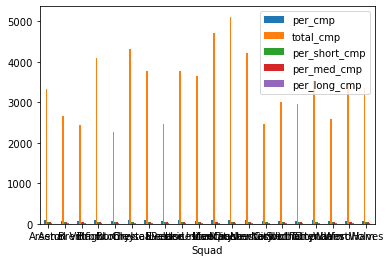

In [11]:
import pandas as pd

df = pd.read_csv("Teams_pass_data.csv")

variety_cmp_array, variety_att_array, prog_array = [], [], []
for team in list(df["Squad"]):
    total_att_passes = df[df["Squad"] == team]["Total Att"].values[0]
    per_att_short_passes = (df[df["Squad"] == team]["Short Att"].values[0]/total_att_passes)*100
    per_att_med_passes = (df[df["Squad"] == team]["Med Att"].values[0]/total_att_passes)*100
    per_att_long_passes = (df[df["Squad"] == team]["Long Att"].values[0]/total_att_passes)*100
    
    per_cmp_passes = df[df["Squad"] == team]["Total Cmp%"].values[0]
    
    total_cmp_passes = df[df["Squad"] == team]["Total Cmp"].values[0]
    per_cmp_short_passes = (df[df["Squad"] == team]["Short Cmp"].values[0]/total_cmp_passes)*100
    per_cmp_med_passes = (df[df["Squad"] == team]["Med Cmp"].values[0]/total_cmp_passes)*100
    per_cmp_long_passes = (df[df["Squad"] == team]["Long Cmp"].values[0]/total_cmp_passes)*100
    
    
    prog_passes = df[df["Squad"] == team]["Prog"].values[0]
    per_prog_passes = (prog_passes/total_cmp_passes)*100
    prog_passes_dist = df[df["Squad"] == team]["Total PrgDist"].values[0]
    
    variety_cmp_array.append([team, per_cmp_passes, total_cmp_passes, per_cmp_short_passes, per_cmp_med_passes, per_cmp_long_passes])
    variety_att_array.append([team, per_cmp_passes, total_att_passes, per_att_short_passes, per_att_med_passes, per_att_long_passes])
    prog_array.append([team, per_prog_passes, prog_passes, prog_passes_dist])

variety_cmp_df = pd.DataFrame(variety_cmp_array, columns = ["Squad", "per_cmp", "total_cmp", "per_short_cmp", "per_med_cmp", "per_long_cmp"]).set_index("Squad")
barplot1 = variety_cmp_df.plot.bar(rot = 0, figuresize = (30, 10))

    
    
    